# <span style = "color:red;"> Multiclass Classification </span>


In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
import numpy as np

X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]
y_train = y_train.astype(np.int8)

In [4]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36011]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

In [5]:
#Shuffle the dataset

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state = 42)
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [7]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[-256768.32214379, -250879.94986688, -366103.23661166,
        -163721.97165943, -416697.27309346,   60265.1292376 ,
        -817599.62473247, -157685.69805437,  -43792.77486582,
        -335220.66320473]])

In [8]:
np.argmax(some_digit_score)

5

In [9]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [10]:
sgd_clf.classes_[5]

5

In [11]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)

45

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])


array([5], dtype=int8)

In [13]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0.1, 0. , 0. , 0. ]])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87712458, 0.88104405, 0.86217933])

## <span style = "color:blue;"> Error Analysis </span>


In [15]:
#To achieve higher accuracy you can scale inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.91076785, 0.9100455 , 0.90983648])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix

cnf_mtx = confusion_matrix(y_train, y_train_pred)
cnf_mtx

array([[5729,    2,   18,   13,   11,   49,   46,    8,   42,    5],
       [   1, 6450,   45,   25,    7,   48,    7,   14,  132,   13],
       [  59,   35, 5319,  106,   87,   25,   95,   55,  163,   14],
       [  56,   44,  131, 5344,    3,  235,   33,   54,  135,   96],
       [  23,   25,   30,   10, 5382,   10,   54,   30,   80,  198],
       [  68,   38,   37,  188,   66, 4629,  106,   29,  167,   93],
       [  34,   23,   36,    2,   40,  100, 5635,    5,   43,    0],
       [  18,   22,   72,   27,   58,   10,    6, 5791,   18,  243],
       [  57,  151,   71,  153,   15,  146,   53,   24, 5037,  144],
       [  38,   34,   23,   93,  151,   38,    2,  189,   84, 5297]],
      dtype=int64)

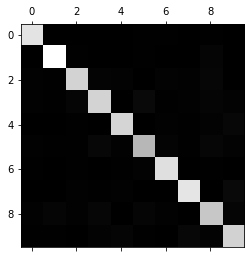

In [18]:
plt.matshow(cnf_mtx, cmap = plt.cm.gray)
plt.show()

In [19]:
row_sums = cnf_mtx.sum(axis = 1, keepdims = True)
norm_cnf_mtx = cnf_mtx / row_sums

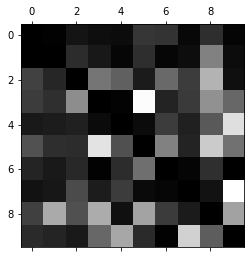

In [20]:
np.fill_diagonal(norm_cnf_mtx, 0)
plt.matshow(norm_cnf_mtx, cmap = plt.cm.gray)
plt.show() #rows --> actual classes, columns --> predicted classesb

In [21]:
def plot_digits(instances, images_per_row=10, **options):
    
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

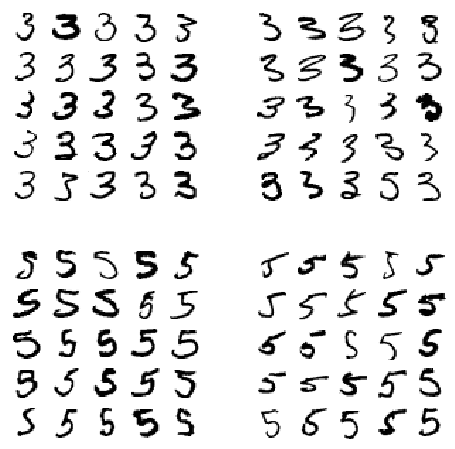

In [22]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()


## <span style = "color:blue;"> Multilabel Classification </span>


In [23]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn_clf.predict([some_digit])

array([[False,  True]])

## <span style = "color:blue;"> Multioutput Classification </span>


In [25]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [26]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

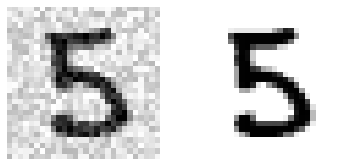

In [27]:
some_index = 5510
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()


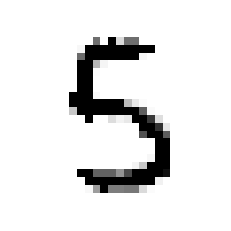

In [28]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)